In [2]:
cd ..

/home/mars/src_aiai


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
import tqdm

In [5]:
from src.visualisation import compare
from src.visualisation import plot_statistics, print_statistics
from skimage.metrics import structural_similarity, peak_signal_noise_ratio, mean_squared_error

In [8]:
losses = {}
epochs = {}
times = {}

ISNR = 30
nets = [
#     "unet_30dB_sigmoid_long", "dunet_30dB_sigmoid_learned_grad_long", 
    "UNet_30dB",
    "highlow_30dB",
    "GUnet_30dB",
    "GUnet_variant_30dB",
    "LFB_30dB",
    
    
    
]

# operator = "NNFFT_Random"
# operator = "NUFFT_Random"
operator = "NUFFT_SPIDER"

for net in nets:
    key = net #.split("_")[0]
    path = f"./logs/COCO/{operator}/log_{net}"
    loss = pd.read_csv(path)
    epochs[key] = loss.epoch.values
    losses[key] = loss.loss.values
    times[key] = loss.time.values

Text(0.5, 0, 'iterations')

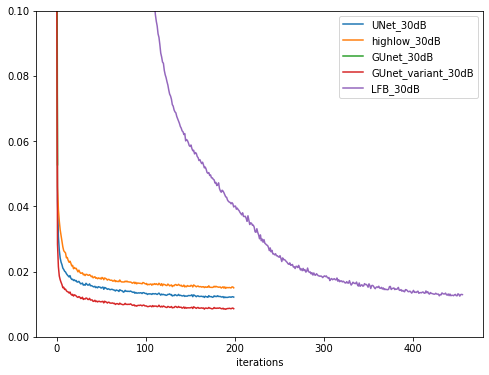

In [9]:
plt.figure(figsize=(8,6))
for i in losses:
    n = np.sum(epochs[i] ==0)
#     print(i, np.sum(epochs[i] ==0))
    plt.plot( losses[i], label = i)
plt.legend()
plt.axis(ymax=.1, ymin=0)
plt.xlabel('iterations')

In [3]:
f = 2

Text(0, 0.5, 'loss')

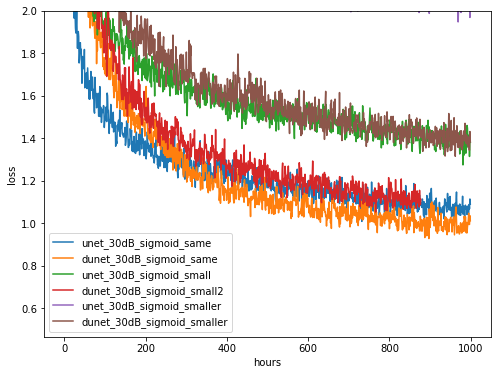

In [8]:
plt.figure(figsize=(8,6))
for i in losses:
    n = np.sum(epochs[i] ==0)
    plt.plot( losses[i]/losses['unet_30dB_sigmoid_same'].min(), label = i)
# plt.axhline(0.020, ls="dashed", alpha=.5, label="PD")
plt.legend()
plt.axis(ymax=f)
plt.xlabel('hours')
plt.ylabel('loss')
# plt.yscale('log')

In [9]:
losses[i].min(), losses[i].min()*f

(0.010936957783997, 0.021873915567994)

In [24]:
true = np.load(f"./data/intermediate/x_true_gen_30dB.npy")

res_unet1 = np.load(f"./data/processed/COCO/test_predict_unet_gen_sigmoid_same.npy")
res_dunet1 = np.load(f"./data/processed/COCO/test_predict_dunet_gen_sigmoid_same.npy")

res_unet2 = np.load(f"./data/processed/COCO/test_predict_unet_gen_sigmoid_spokes.npy")
res_dunet2 = np.load(f"./data/processed/COCO/test_predict_dunet_gen_sigmoid_small2.npy")

res_unet3 = np.load(f"./data/processed/COCO/test_predict_unet_gen_sigmoid_smaller.npy")
res_dunet3 = np.load(f"./data/processed/COCO/test_predict_dunet_gen_sigmoid_smaller.npy")

nets = [
    ('unet depth 4', res_unet1), 
    ('dunet depth 4', res_dunet1),
    ('unet depth 3', res_unet2), 
    ('dunet depth 3', res_dunet2),
    ('unet depth 2', res_unet3), 
    ('dunet depth 2', res_dunet3),
]

# res_dunet= res_unet

FileNotFoundError: [Errno 2] No such file or directory: './data/processed/COCO/test_predict_unet_gen_sigmoid_spokes.npy'

In [11]:


metrics = [
    ("PSNR", peak_signal_noise_ratio),
    ("SSIM", structural_similarity),
    ("MSE", mean_squared_error)
]

In [12]:
statistics = pd.DataFrame(columns=["PSNR", "SSIM", "MSE", "method", "Set"])

x = true


for name, pred in tqdm.tqdm(nets):
    for idx, sets in [(0, "COCO"), (1000, "GZOO"), (2000, "LLPS"), (3000, "SATS")]:
        df = pd.DataFrame()

        for metric, f in metrics:

            df[metric] = [f(x[i], pred[i].astype(np.float64)) for i in range(idx, idx+1000)]
        df['Method'] = name
        df['Set'] = sets
        if statistics.empty:
            statistics = df
        else:
            statistics = statistics.append(df, ignore_index=False)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [03:19<00:00, 33.19s/it]


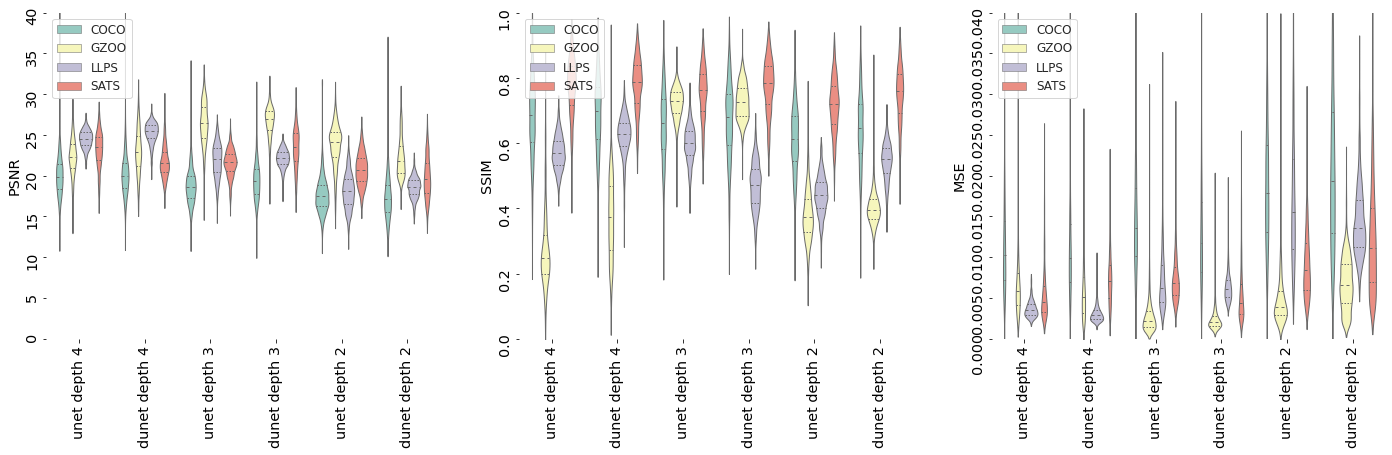

In [13]:
plot_statistics(statistics, metrics, split=False)

In [14]:
results = []
# results += [('unet', sets, '') for idx, sets in [(0, "COCO"), (100, "GZOO"), (200, "LLPS"), (300, "SATS")]]
# results += [('dunet', sets, '') for idx, sets in [(0, "COCO"), (100, "GZOO"), (200, "LLPS"), (300, "SATS")]]

results += [(net, sets, '') for idx, sets in [(0, "COCO"), (100, "GZOO"), (200, "LLPS"), (300, "SATS")] for net, _ in nets]



In [21]:
for data in ['COCO', "GZOO", "LLPS", "SATS"]:
    ress = [(net, data, '') for net, _ in nets]
    print_statistics(statistics[statistics.Set == data], ress, metrics);
    print()

|Name                                    |PSNR                |SSIM                |MSE                 |
|dunet depth 2_COCO                      |  17.289 \pm   2.805|   0.643 \pm   0.117|   0.022 \pm   0.013|
|dunet depth 3_COCO                      |  19.414 \pm   2.449|   0.668 \pm   0.120|   0.013 \pm   0.008|
|dunet depth 4_COCO                      |  20.257 \pm   2.888|   0.689 \pm   0.121|   0.011 \pm   0.007|
|unet depth 2_COCO                       |  17.634 \pm   2.201|   0.610 \pm   0.109|   0.019 \pm   0.009|
|unet depth 3_COCO                       |  18.780 \pm   2.329|   0.655 \pm   0.118|   0.015 \pm   0.008|
|unet depth 4_COCO                       |  20.054 \pm   2.753|   0.678 \pm   0.123|   0.012 \pm   0.007|

|Name                                    |PSNR                |SSIM                |MSE                 |
|dunet depth 2_GZOO                      |  22.235 \pm   2.423|   0.400 \pm   0.054|   0.007 \pm   0.003|
|dunet depth 3_GZOO                      |  2

In [16]:
print_statistics(statistics, results, metrics)

|Name                                    |PSNR                |SSIM                |MSE                 |
|dunet depth 2_COCO                      |  17.289 \pm   2.805|   0.643 \pm   0.117|   0.022 \pm   0.013|
|dunet depth 2_GZOO                      |  22.235 \pm   2.423|   0.400 \pm   0.054|   0.007 \pm   0.003|
|dunet depth 2_LLPS                      |  18.578 \pm   1.305|   0.544 \pm   0.058|   0.015 \pm   0.005|
|dunet depth 2_SATS                      |  19.799 \pm   2.553|   0.752 \pm   0.085|   0.012 \pm   0.007|
|dunet depth 3_COCO                      |  19.414 \pm   2.449|   0.668 \pm   0.120|   0.013 \pm   0.008|
|dunet depth 3_GZOO                      |  26.584 \pm   2.067|   0.728 \pm   0.056|   0.003 \pm   0.002|
|dunet depth 3_LLPS                      |  22.115 \pm   1.128|   0.469 \pm   0.073|   0.006 \pm   0.002|
|dunet depth 3_SATS                      |  23.390 \pm   2.507|   0.775 \pm   0.085|   0.005 \pm   0.004|
|dunet depth 4_COCO                      |  20

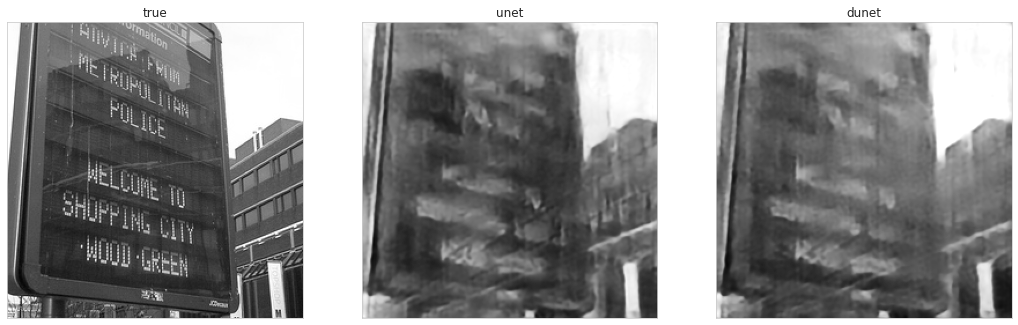

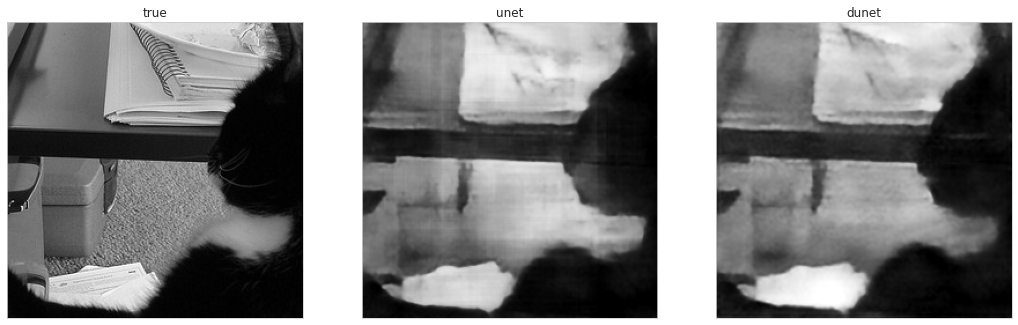

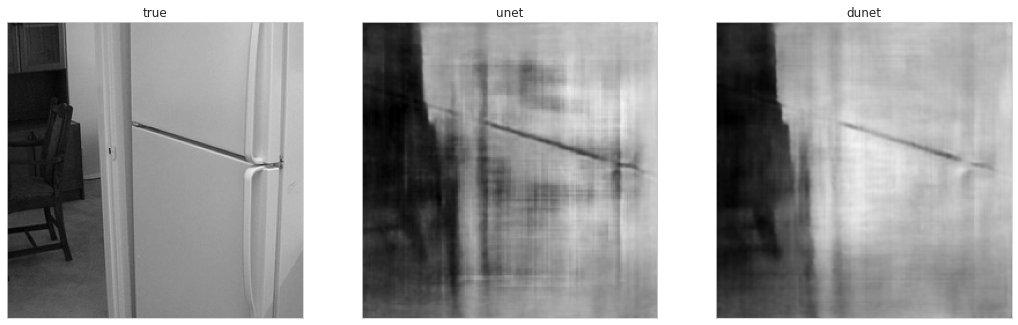

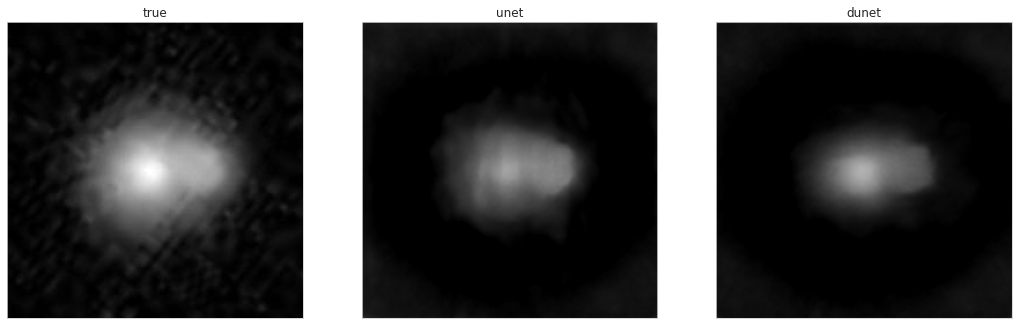

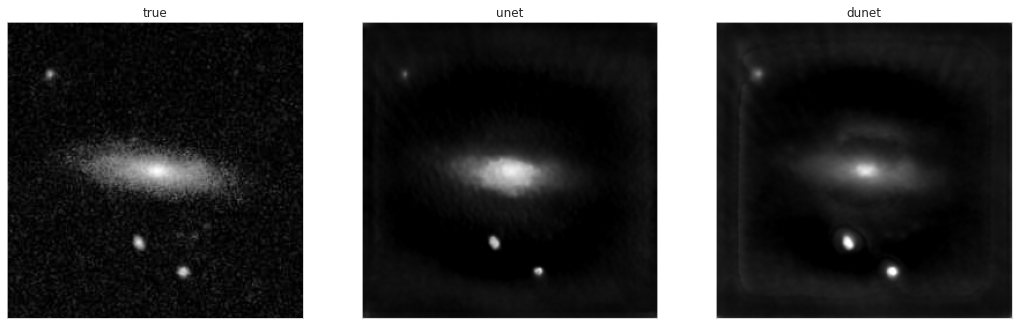

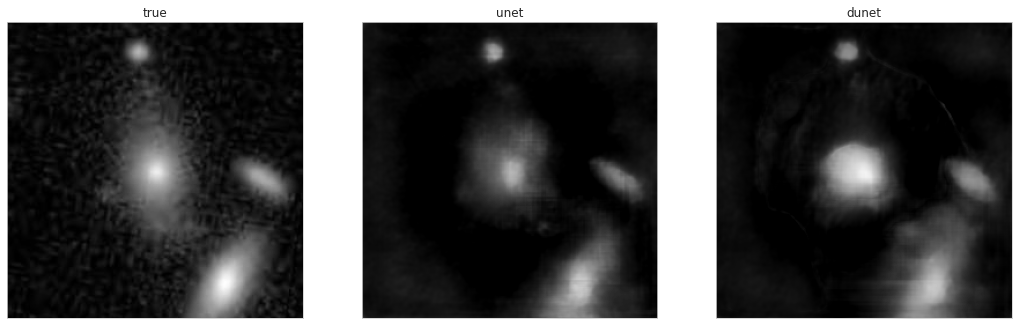

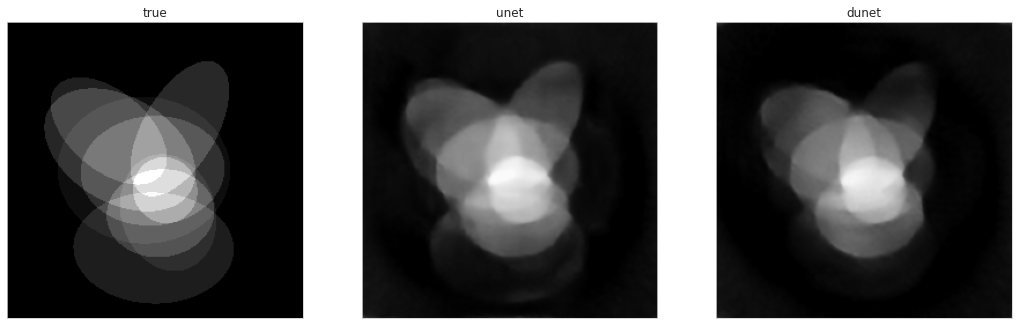

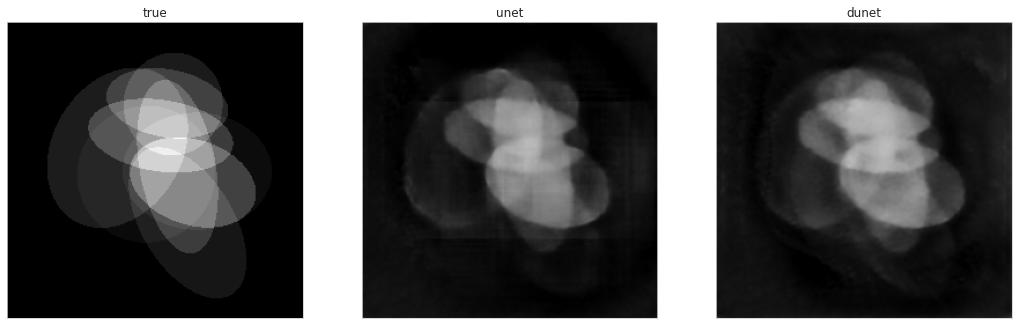

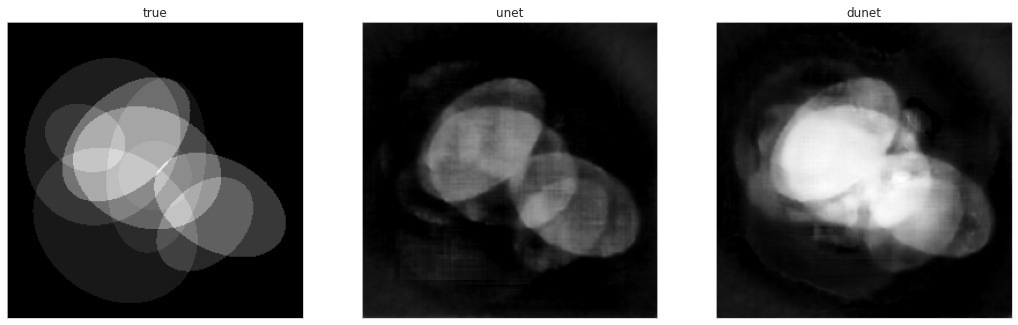

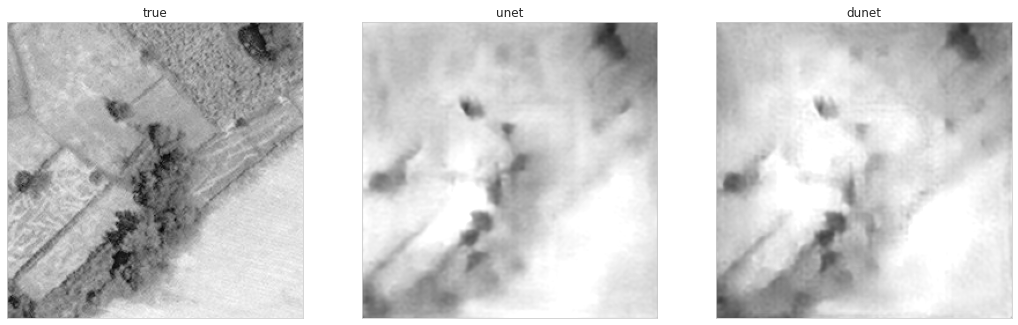

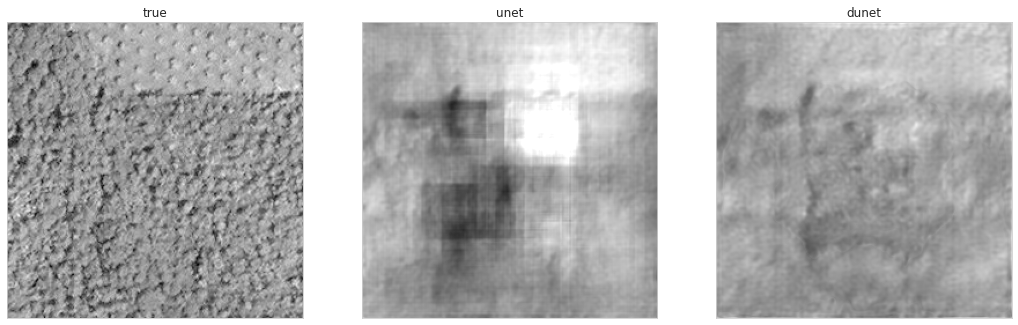

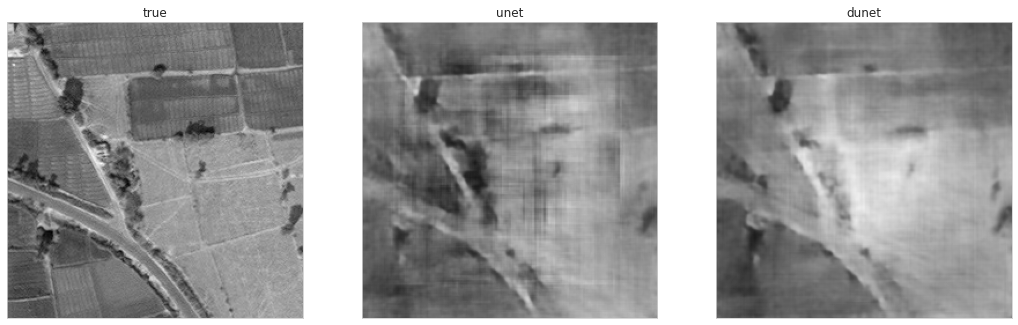

In [22]:
a = [res_unet1, res_unet2, res_unet3]
b = [res_dunet1, res_dunet2, res_dunet3] # depth 4, 3, 2
j = 0
for i in [0,1000,2000,3000]:
    for j in range(3):
        compare([true[i], a[j][i], b[j][i]], cmap='gray', titles=['true', 'unet', 'dunet'], same_scale=True)
        i += 1

In [18]:
true = np.load(f"./data/intermediate/x_true_gen_30dB.npy")

res_unet_LLPS = np.load(f"./data/processed/LLPS/test_predict_unet_gen_sigmoid.npy")
# res_dunet_LLPS = np.load(f"./data/processed/LLPS/test_predict_dunet_gen_sigmoid_same.npy")

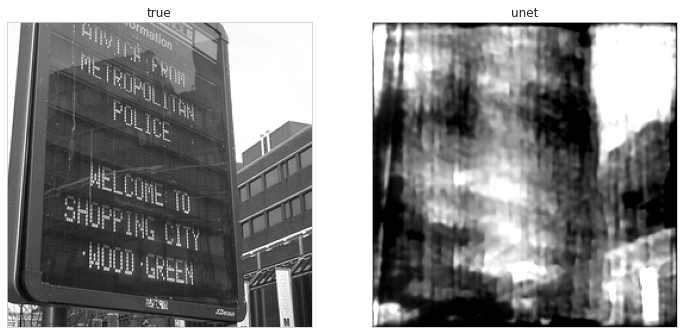

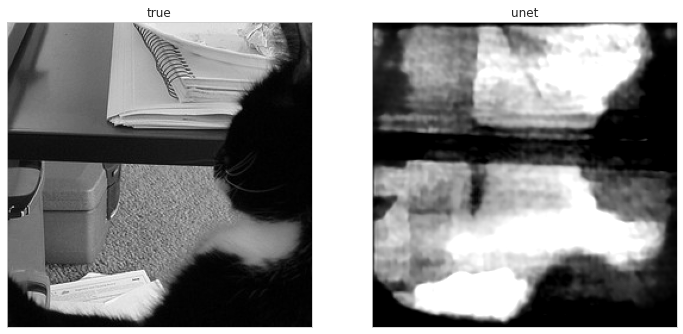

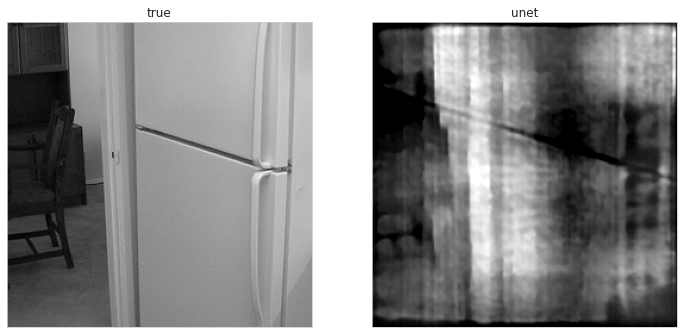

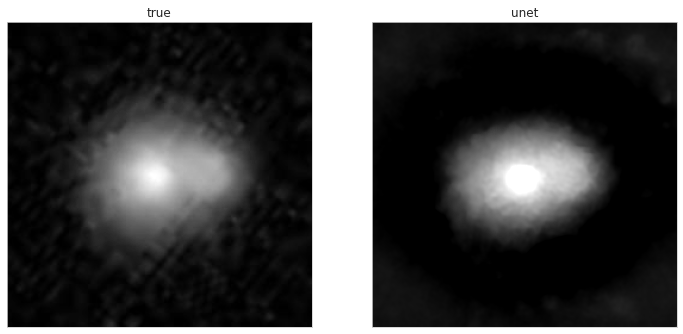

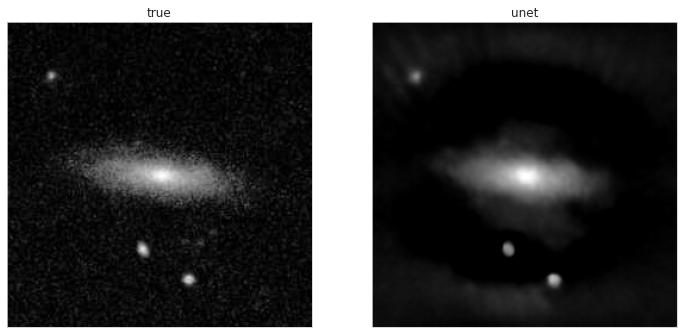

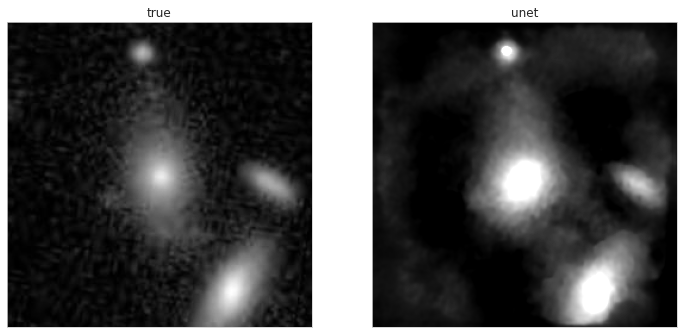

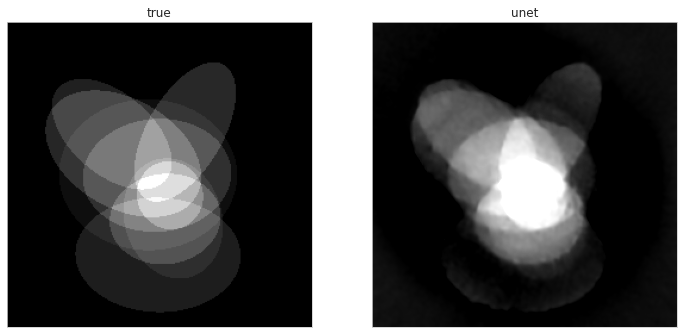

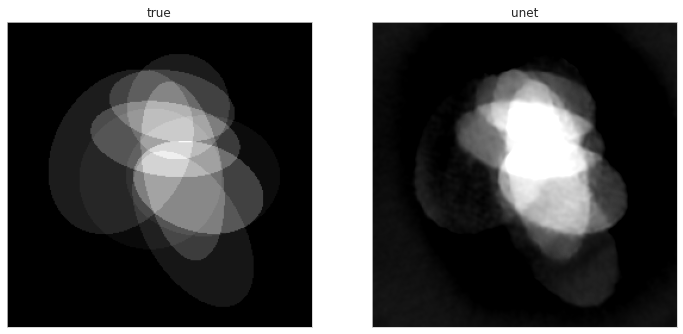

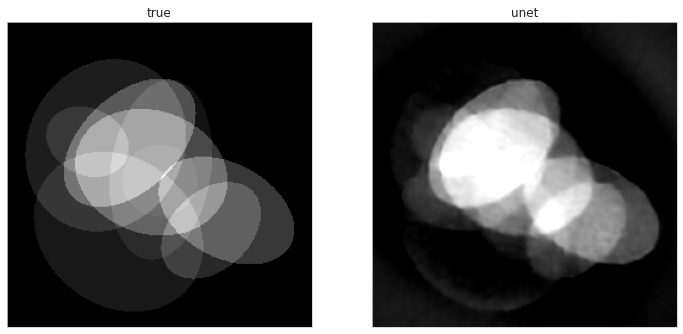

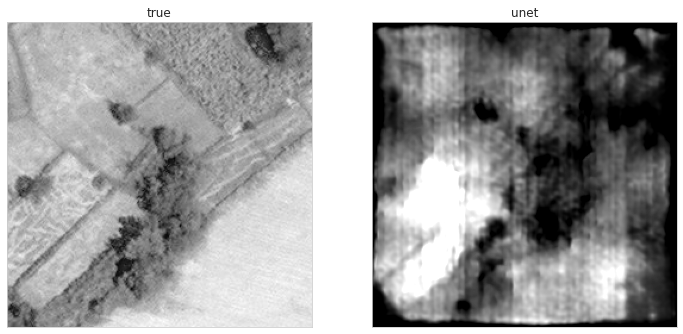

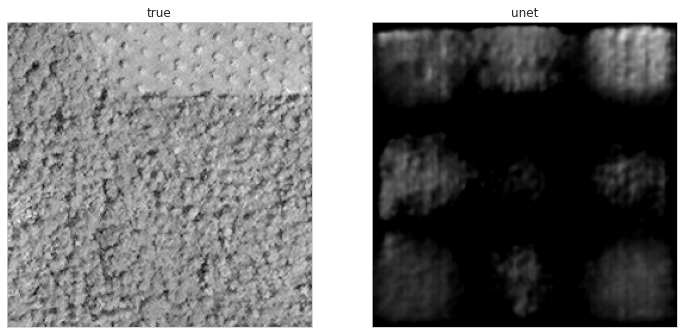

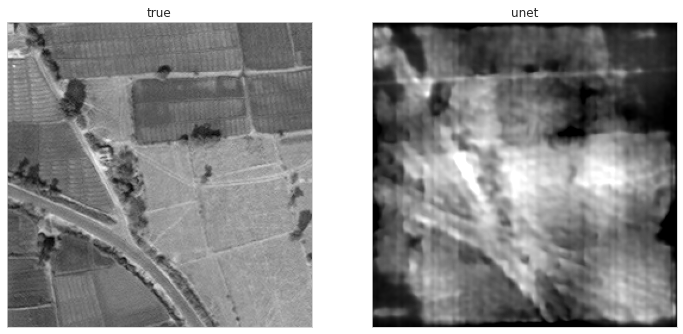

In [20]:
for i in [0,1000,2000,3000]:
    for j in range(3):
        compare([true[i], res_unet_LLPS[i]], cmap='gray', titles=['true', 'unet', 'dunet'], same_scale=True)
        i += 1

In [171]:
a = statistics.SSIM.values.reshape(-1, 1000)
labels = statistics.Method.values.reshape(-1, 1000)[:,0]

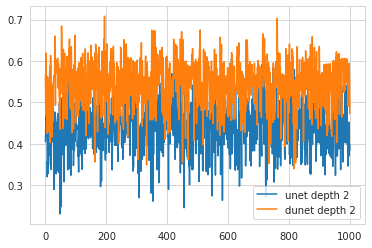

In [116]:
i, j = 0, 4

k = 18

i += k
j += k
plt.plot(a[i], label=labels[i])
plt.plot(a[j], label=labels[j])
plt.legend()

0.2554549886453856


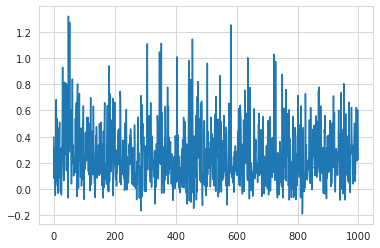

In [117]:
plt.plot((a[j] - a[i])/a[i], label=labels[i])
# plt.axhline(np.mean(a[j]/a[i]))
print(np.mean((a[j] - a[i])/a[i]))

In [112]:
np.mean(a[j] > a[i])

0.911

In [93]:
labels

array(['unet depth 4', 'unet depth 4', 'unet depth 4', 'unet depth 4',
       'dunet depth 4', 'dunet depth 4', 'dunet depth 4', 'dunet depth 4',
       'unet depth 3', 'unet depth 3', 'unet depth 3', 'unet depth 3',
       'dunet depth 3', 'dunet depth 3', 'dunet depth 3', 'dunet depth 3',
       'unet depth 2', 'unet depth 2', 'unet depth 2', 'unet depth 2',
       'dunet depth 2', 'dunet depth 2', 'dunet depth 2', 'dunet depth 2'],
      dtype=object)

In [133]:
mat = np.mean(a.reshape(-1,4).T/a[:4])

ValueError: operands could not be broadcast together with shapes (4,6000) (4,1000) 

In [186]:
for key in ["PSNR", "SSIM"]:
    print("\n" + f"{key:20} {'COCO':7} {'GZOO':7} {'LLPS':7} {'SATS':7}")
    a = statistics[key].values.reshape(-1, 1000)
    labels = statistics.Method.values.reshape(-1, 1000)[:,0]

    mat = np.array([ a[i] / a[i%4] for i in range(len(a))])
    mat = np.median(mat, axis=-1).reshape(-1,4)
    
    for i in range(len(mat)):
        print(f"{labels[i*4]:20}", end="")
        for j in range(mat.shape[1]):
            print(f"{mat[i,j].astype(float):.3f}   ", end="")
        print()


PSNR                 COCO    GZOO    LLPS    SATS   
unet depth 4        1.000   1.000   1.000   1.000   
dunet depth 4       1.014   1.059   1.032   0.937   
unet depth 3        0.944   1.218   0.894   0.930   
dunet depth 3       0.978   1.212   0.901   1.013   
unet depth 2        0.890   1.092   0.740   0.897   
dunet depth 2       0.878   1.020   0.761   0.850   

SSIM                 COCO    GZOO    LLPS    SATS   
unet depth 4        1.000   1.000   1.000   1.000   
dunet depth 4       1.013   1.606   1.201   1.106   
unet depth 3        1.059   3.152   1.145   1.070   
dunet depth 3       1.000   2.879   0.832   1.013   
unet depth 2        0.919   1.624   1.201   1.437   
dunet depth 2       1.455   2.451   1.480   1.501   
